In [3]:
from datashop import *
import plotly

In [10]:
df1 = pd.read_csv('data/nyt_articles.csv')
df1.columns

Index(['Unnamed: 0', 'id', 'date', 'abstract', 'doc_type', 'main_headline',
       'print_headline', 'keywords', 'newsdesk', 'url'],
      dtype='object')

In [3]:
df1 = pd.read_csv('nyt_api/nyt_articles.csv')
#df1['dicts'] = df['keywords'].apply(lambda x: eval(x))
#df1['dict_lens'] = df['dicts'].apply(len)
def extractRow(row):
    list = row['dicts']

    for num,item in enumerate(list):
        row[str(num) + '_type'] = item['name']
        row[str(num) + '_keyword'] = item['value']

    return row
#df1 = df1.apply(extractRow,axis=1)
#df1.to_csv('nyt_api/nyt_with_keywords.csv')
print(df1.columns)
df = pd.read_csv('nyt_api/nyt_with_keywords.csv')

Index(['Unnamed: 0', 'id', 'date', 'abstract', 'doc_type', 'main_headline',
       'print_headline', 'keywords', 'newsdesk'],
      dtype='object')


In [14]:
df['date_col'] = df['date'].str.slice(stop=10)
df['date_col']=pd.to_datetime(
            df['date_col'],
            format = '%Y-%m-%d'
        )
df.set_index(
            df['date_col'],drop=True,inplace=True)


,Unnamed: 0,0_keyword,0_type,10_keyword,10_type,11_keyword,11_type,12_keyword,12_type,13_keyword,...,date,dict_lens,dicts,doc_type,id,keywords,main_headline,newsdesk,print_headline,date_col
date_col,,,,,,,,,,,,,,,,,,,,,
2000-12-30,0,Hunt Oil Co,organizations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000-12-30T05:00:00+0000,4,"[{'name': 'organizations', 'value': 'Hunt Oil ...",article,nyt://article/0914c010-16d4-54bf-9098-4045adc3...,"[{'name': 'organizations', 'value': 'Hunt Oil ...",BERKLEY PETROLEUM APPROVES SHAREHOLDER RIGHTS ...,Business/Financial Desk,COMPANY NEWS; BERKLEY PETROLEUM APPROVES SHARE...,2000-12-30
2000-12-23,1,New Mexico,glocations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000-12-23T05:00:00+0000,6,"[{'name': 'glocations', 'value': 'New Mexico',...",article,nyt://article/1fe65aa7-59d3-500d-8071-b32e5eb5...,"[{'name': 'glocations', 'value': 'New Mexico',...",Delta Petroleum in Deal,Business/Financial Desk,Delta Petroleum in Deal,2000-12-23
2000-12-29,2,Oil (Petroleum) and Gasoline,subject,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000-12-29T05:00:00+0000,2,"[{'name': 'subject', 'value': 'Oil (Petroleum)...",article,nyt://article/e084f9f3-03e1-5608-a6ec-923d6bd3...,"[{'name': 'subject', 'value': 'Oil (Petroleum)...",THE MARKETS: COMMODITIES,Business/Financial Desk,THE MARKETS: COMMODITIES,2000-12-29
2000-12-31,3,Brazil,glocations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000-12-31T05:00:00+0000,4,"[{'name': 'glocations', 'value': 'Brazil', 'ra...",article,nyt://article/07ee3d9c-57c2-5e1c-b1cc-b4b1cbbe...,"[{'name': 'glocations', 'value': 'Brazil', 'ra...",Exploratory Oil Drilling From S to X and Back,Money and Business/Financial Desk,BUSINESS: DIARY; Exploratory Oil Drilling From...,2000-12-31
2000-12-27,4,Weather,subject,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000-12-27T05:00:00+0000,5,"[{'name': 'subject', 'value': 'Weather', 'rank...",article,nyt://article/f577789f-abf5-5275-be64-cd1fe8fd...,"[{'name': 'subject', 'value': 'Weather', 'rank...",THE MARKETS: COMMODITIES,Business/Financial Desk,THE MARKETS: COMMODITIES,2000-12-27


In [18]:
df.sort_index(inplace=True)
df.drop('date_col',axis=1,inplace=True)
display(df[['date','main_headline']].head())

,date,main_headline
date_col,,
2000-01-01,2000-01-01T05:00:00+0000,SCHLUMBERGER COMPLETES SPINOFF OF OFFSHORE OIL...
2000-01-04,2000-01-04T05:00:00+0000,From the Pipeline To the Courtroom; Gap on BP ...
2000-01-08,2000-01-08T05:00:00+0000,The Greening of Corporate America
2000-01-08,2000-01-08T05:00:00+0000,THE MARKETS: COMMODITIES
2000-01-09,2000-01-09T05:00:00+0000,Defanging the Great Inflationary Forces


In [19]:
import sqlite3

conn = sqlite3.connect('data/energydash.db')

df.to_sql("news",conn, if_exists='replace')

In [4]:
df['date'].head()

0    2000-12-30T05:00:00+0000
1    2000-12-23T05:00:00+0000
2    2000-12-29T05:00:00+0000
3    2000-12-31T05:00:00+0000
4    2000-12-27T05:00:00+0000
Name: date, dtype: object

Possibly Categorical?            No
Length                        12483
Values                        11976
Missing                  507(4.06)%
Unique                          118
dtype: object

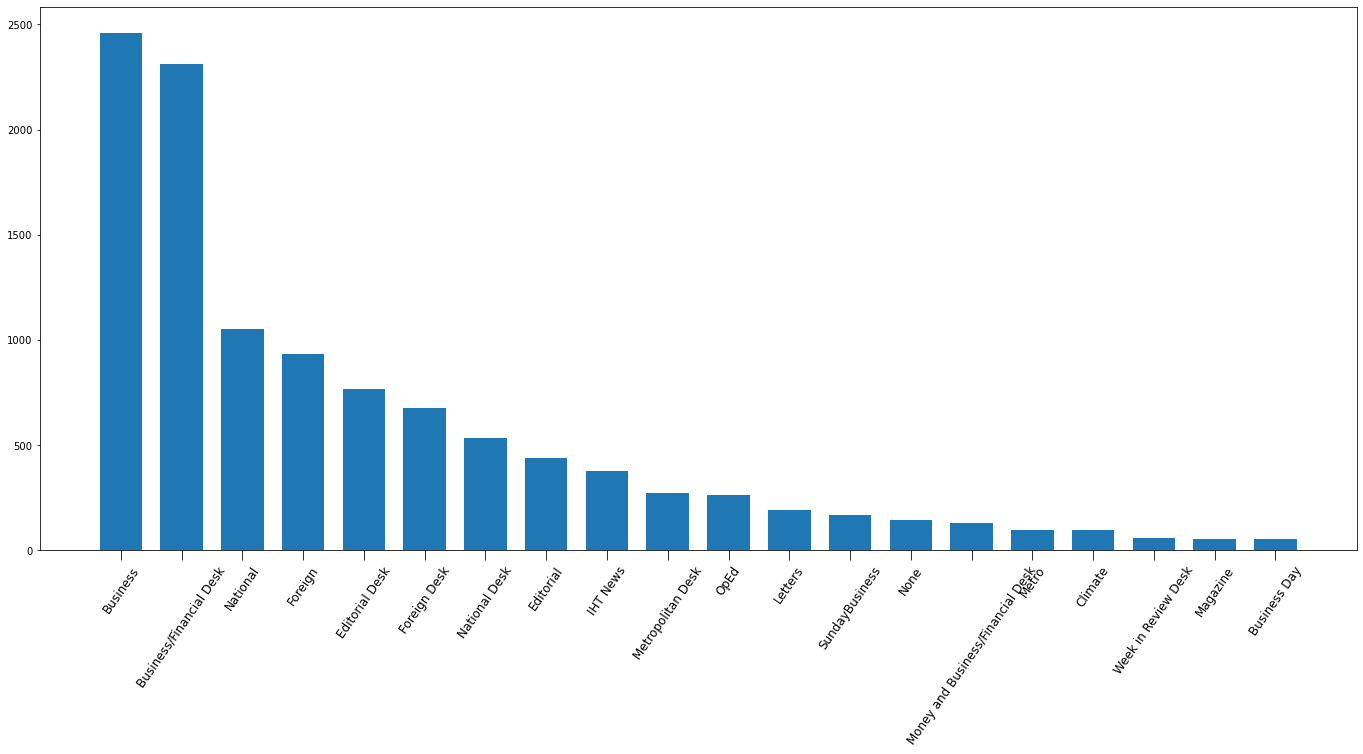

In [5]:
rank1 = Feature(df['newsdesk'],'rank1')
rank1.show_report(cap = 20)

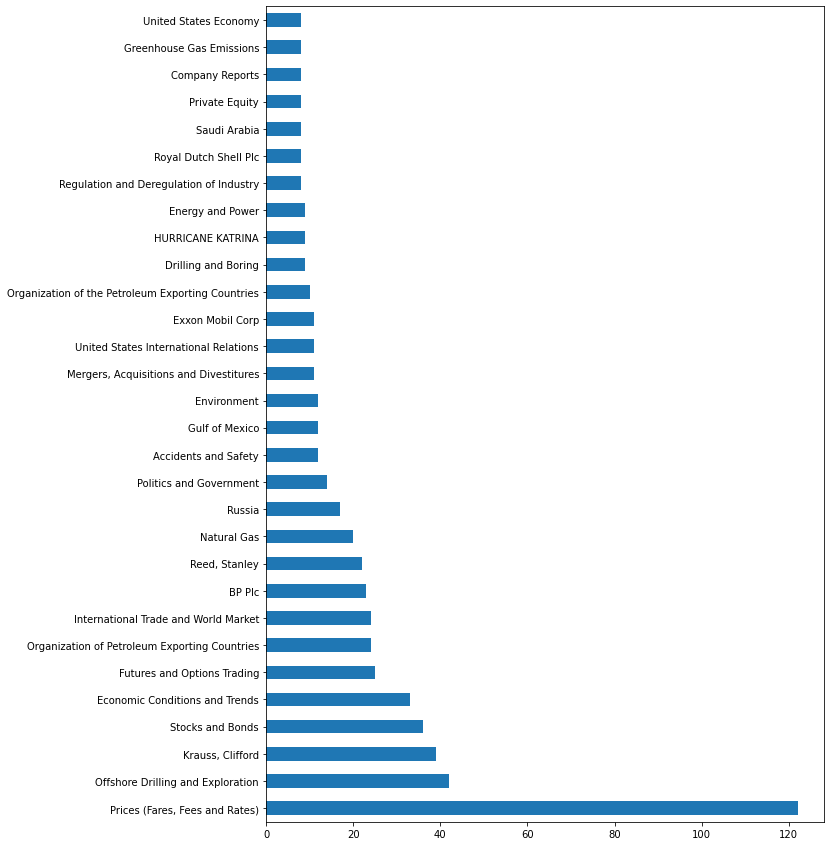

In [7]:
rank0_counts = df['0_keyword'].value_counts()

rank0 = rank0_counts.index[0]

df_rank0 = df[df['0_keyword'] == rank0]

df_rank0_rank1 = df_rank0['1_keyword'].value_counts()

df_rank0_rank1.head(30).plot(kind='barh',figsize=(10,15))

df['dicts'] = df['']